Our objective is to analyze Bank's customers data and understand how various financial and personal factors impact loan risk. As a data analyst, the goal is not to build a predictive model, but to perform Exploratory Data Analysis (EDA) to identify meaningful patterns and create a rule-based risk profiling system.

In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)
pd.set_option('display.width',None)

In [2]:
#importing data and convert it into DataFrame
data = pd.read_csv("Banking.csv")
df = pd.DataFrame(data)

In [3]:
#Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Client ID                 3000 non-null   object 
 1   Name                      3000 non-null   object 
 2   Age                       3000 non-null   int64  
 3   Location ID               3000 non-null   int64  
 4   Joined Bank               3000 non-null   object 
 5   Banking Contact           3000 non-null   object 
 6   Nationality               3000 non-null   object 
 7   Occupation                3000 non-null   object 
 8   Fee Structure             3000 non-null   object 
 9   Loyalty Classification    3000 non-null   object 
 10  Estimated Income          3000 non-null   float64
 11  Superannuation Savings    3000 non-null   float64
 12  Amount of Credit Cards    3000 non-null   int64  
 13  Credit Card Balance       3000 non-null   float64
 14  Bank Loa

# Columns Summary

In [4]:
# Dataset Overview and Column Descriptions:
# 
# 1. 'Client ID' - Unique identifier for each client.
# 2. 'Name' - Name of the client.
# 3. 'Age' - Age of the client (in years).
# 4. 'Location ID' - Numerical identifier for the client's location.
# 5. 'Joined Bank' - The date the client joined the bank.
# 6. 'Banking Contact' - The contact person or agent assigned to the client.
# 7. 'Nationality' - Nationality of the client.
# 8. 'Occupation' - Client's job or professional occupation.
# 9. 'Fee Structure' - Type of fee structure the client has (e.g., retail, institutional).
# 10. 'Loyalty Classification' - Loyalty status or classification of the client (e.g., bronze, gold, etc.).
# 11. 'Estimated Income' - Client’s annual income in local currency.
# 12. 'Superannuation Savings' - The amount the client has saved in superannuation (retirement savings).
# 13. 'Amount of Credit Cards' - Number of credit cards the client holds.
# 14. 'Credit Card Balance' - Total balance the client owes across all their credit cards.
# 15. 'Bank Loans' - Total amount the client has borrowed from the bank in loans.
# 16. 'Bank Deposits' - Total balance in the client’s bank deposit accounts (including savings, fixed deposits, etc.). This represents the amount currently available across various types of deposit accounts, not a historical sum.
# 17. 'Checking Accounts' - Balance in the client’s checking accounts (often used for daily transactions).
# 18. 'Saving Accounts' - Balance in the client’s savings accounts.
# 19. 'Foreign Currency Account' - Balance in the client’s foreign currency accounts (if any).
# 20. 'Business Lending' - Amount the client has borrowed for business purposes.
# 21. 'Properties Owned' - Number of properties owned by the client.
# 22. 'Risk Weighting' - The current risk rating assigned to the client based on various financial indicators.
# 23. 'BRId' - Banking Relationship ID assigned to the client.
# 24. 'GenderId' - Numerical identifier for the client's gender.
# 25. 'IAId' - Investment Advisor ID assigned to the client.
#
# Note:
# - 'Bank Deposits', 'Checking Accounts', and 'Saving Accounts' columns represent the current available balances in the respective accounts.
# - These columns reflect the amounts currently held by the client in their accounts, NOT cumulative deposits over a time period.
# - 'Bank Deposits' likely includes funds across various deposit types, not just checking or savings accounts.
# - 'Risk Weighting' reflects how risky the client is deemed to be from a financial perspective, based on their financial status.


In [5]:
# Descriptive Statistics
df.describe()

,Age,Location ID,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,171305.034263,25531.599673,1.463667,3176.206943,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529993,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333
std,19.854760,12462.273017,111935.808209,16259.950770,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924010,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242
min,17.000000,12.000000,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,82906.595000,12513.775000,1.000000,1236.630000,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21129.500000,142313.480000,22357.355000,1.000000,2560.805000,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32054.500000,242290.305000,35464.740000,2.000000,4522.632500,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,522330.260000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000


In [6]:
#Fill values of GenderId column and rename it to Gender
df["GenderId"].replace({1 : "Male",2:"Female"},inplace = True)
df = df.rename(columns = {"GenderId" : "Gender"})

C:\Users\nikuj\AppData\Local\Temp\ipykernel_14424\4125812363.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["GenderId"].replace({1 : "Male",2:"Female"},inplace = True)


# EDA

<Axes: xlabel='Income Status'>

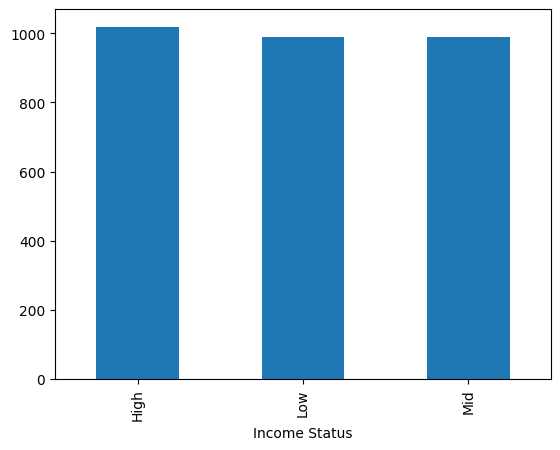

In [7]:
#Set bends on Estimated Income column 
quantiles = df["Estimated Income"].quantile([0, 0.33, 0.66, 1])
bins = quantiles.values
labels = ['Low','Mid','High']
df["Income Status"] = pd.cut(df["Estimated Income"],bins = bins,labels = labels,right = False)
#Now using .plot we can see in which range our mostly customer lies
df["Income Status"].value_counts().plot(kind = 'bar')

In [8]:
df["Income Status"].value_counts()

Income Status
High    1019
Low      990
Mid      990
Name: count, dtype: int64

In [9]:
# Converting numerical values in the categorical column to their respective category labels
df["BRId"] = df["BRId"].replace({1:"Retail",2:"Institutional",3:"Private Bank",4:"Commercial"})
df.rename(columns = {"BRId":"Banking Relationships"},inplace = True)

In [10]:
# Converting numerical values in the categorical column to their respective category labels
df["IAId"] = df["IAId"].map({
    1: 'Victor Dean',
    2: 'Jeremy Porter',
    3: 'Ernest Knight',
    4: 'Eric Shaw',
    5: 'Kevin Kim',
    6: 'Victor Rogers',
    7: 'Eugene Cunningham',
    8: 'Joe Carroll',
    9: 'Steve Sanchez',
    10: 'Lawrence Sanchez',
    11: 'Peter Castillo',
    12: 'Victor Gutierrez',
    13: 'Daniel Carroll',
    14: 'Carl Anderson',
    15: 'Nicholas Ward',
    16: 'Fred Bryant',
    17: 'Ryan Taylor',
    18: 'Sean Vasquez',
    19: 'Nicholas Morrison',
    20: 'Jack Phillips',
    21: 'Juan Ramirez',
    22: 'Gregory Boyd'
})
#Renaming the column
df.rename(columns = {"IAId":"Investment Advisor"},inplace = True)

In [11]:
df.columns

Index(['Client ID', 'Name', 'Age', 'Location ID', 'Joined Bank',
       'Banking Contact', 'Nationality', 'Occupation', 'Fee Structure',
       'Loyalty Classification', 'Estimated Income', 'Superannuation Savings',
       'Amount of Credit Cards', 'Credit Card Balance', 'Bank Loans',
       'Bank Deposits', 'Checking Accounts', 'Saving Accounts',
       'Foreign Currency Account', 'Business Lending', 'Properties Owned',
       'Risk Weighting', 'Banking Relationships', 'Gender',
       'Investment Advisor', 'Income Status'],
      dtype='object')

In [12]:
#Examine the distribution of unique categories in categorical columns
cat_columns = df[["Nationality","Fee Structure","Loyalty Classification","Amount of Credit Cards","Properties Owned","Risk Weighting",	"Banking Relationships","Occupation","Gender","Investment Advisor","Income Status"]].columns
for col in cat_columns:
    print(f"\nValue Counts for {col} :")
    display(df[col].value_counts())


Value Counts for Nationality :


Nationality
European      1309
Asian          754
American       507
Australian     254
African        176
Name: count, dtype: int64


Value Counts for Fee Structure :


Fee Structure
High    1476
Mid      962
Low      562
Name: count, dtype: int64


Value Counts for Loyalty Classification :


Loyalty Classification
Jade        1331
Silver       767
Gold         585
Platinum     317
Name: count, dtype: int64


Value Counts for Amount of Credit Cards :


Amount of Credit Cards
1    1922
2     765
3     313
Name: count, dtype: int64


Value Counts for Properties Owned :


Properties Owned
2    777
1    776
3    742
0    705
Name: count, dtype: int64


Value Counts for Risk Weighting :


Risk Weighting
2    1222
1     836
3     460
4     322
5     160
Name: count, dtype: int64


Value Counts for Banking Relationships :


Banking Relationships
Private Bank     1352
Retail            660
Institutional     495
Commercial        493
Name: count, dtype: int64


Value Counts for Occupation :


Occupation
Associate Professor             28
Structural Analysis Engineer    28
Recruiter                       25
Account Coordinator             24
Human Resources Manager         24
                                ..
Office Assistant IV              8
Automation Specialist I          7
Computer Systems Analyst I       6
Developer III                    5
Senior Sales Associate           4
Name: count, Length: 195, dtype: int64


Value Counts for Gender :


Gender
Female    1512
Male      1488
Name: count, dtype: int64


Value Counts for Investment Advisor :


Investment Advisor
Victor Dean          177
Jeremy Porter        177
Ernest Knight        177
Eric Shaw            177
Joe Carroll          177
Steve Sanchez        176
Daniel Carroll       176
Victor Gutierrez     176
Lawrence Sanchez     176
Peter Castillo       176
Carl Anderson        176
Nicholas Ward        176
Victor Rogers         89
Kevin Kim             89
Eugene Cunningham     89
Fred Bryant           88
Ryan Taylor           88
Sean Vasquez          88
Nicholas Morrison     88
Jack Phillips         88
Juan Ramirez          88
Gregory Boyd          88
Name: count, dtype: int64


Value Counts for Income Status :


Income Status
High    1019
Low      990
Mid      990
Name: count, dtype: int64

UNIVARIANT ANALYSIS

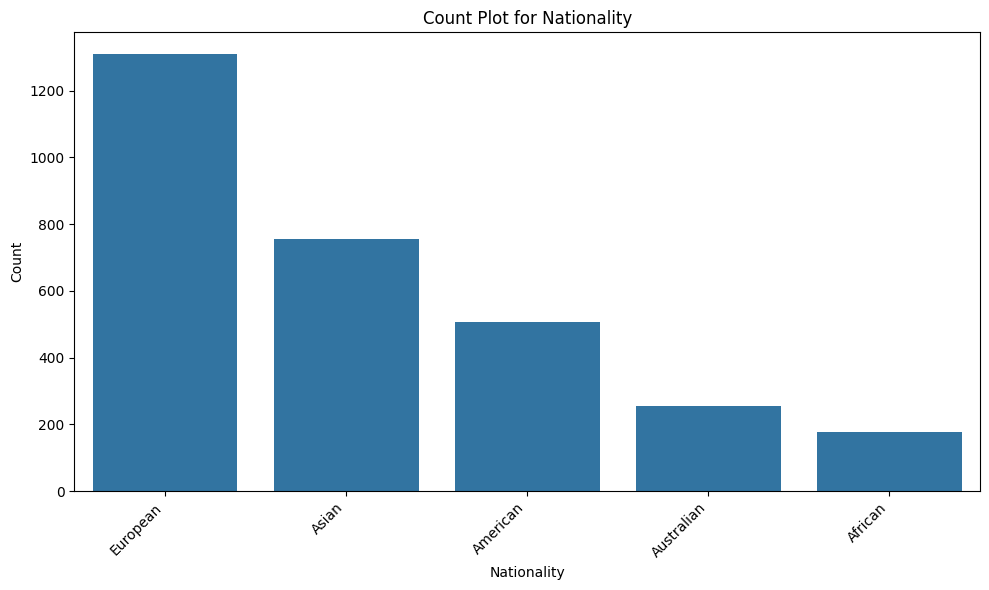

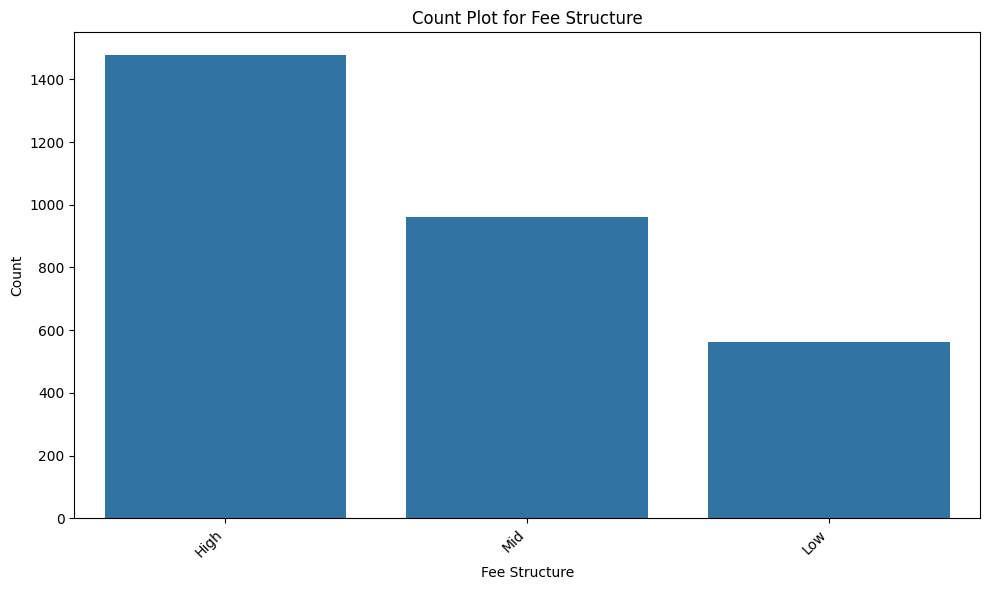

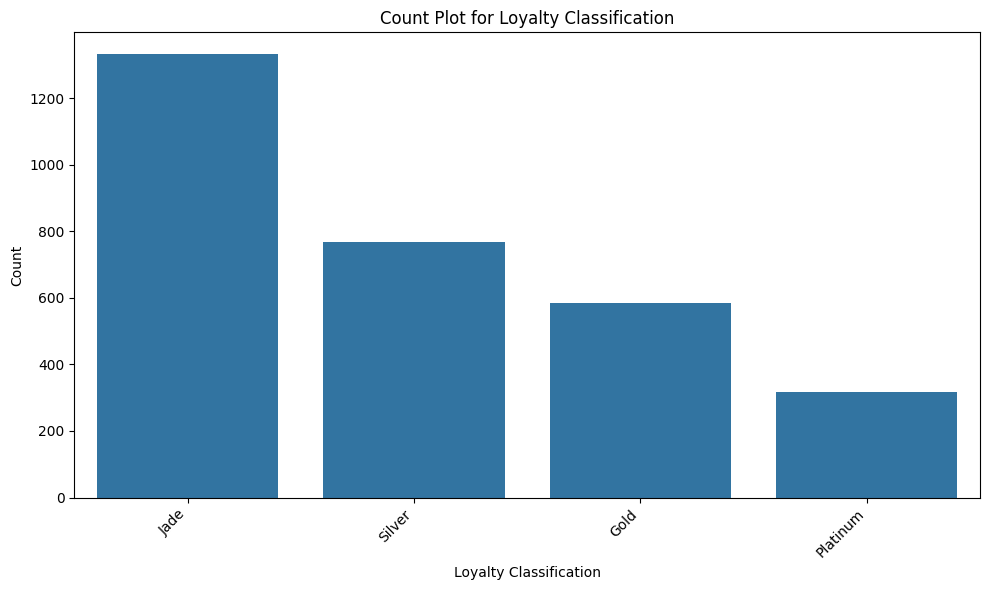

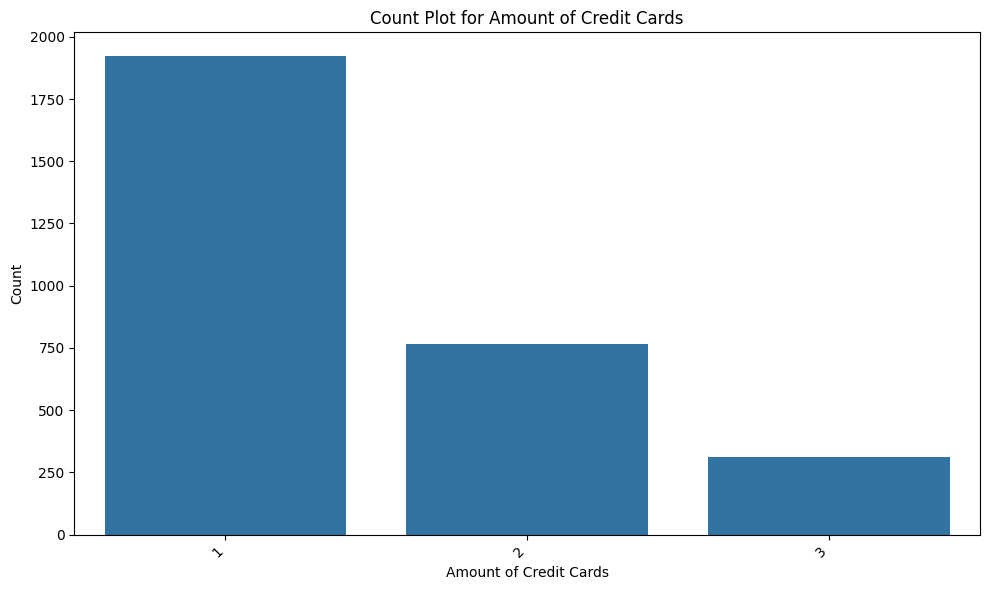

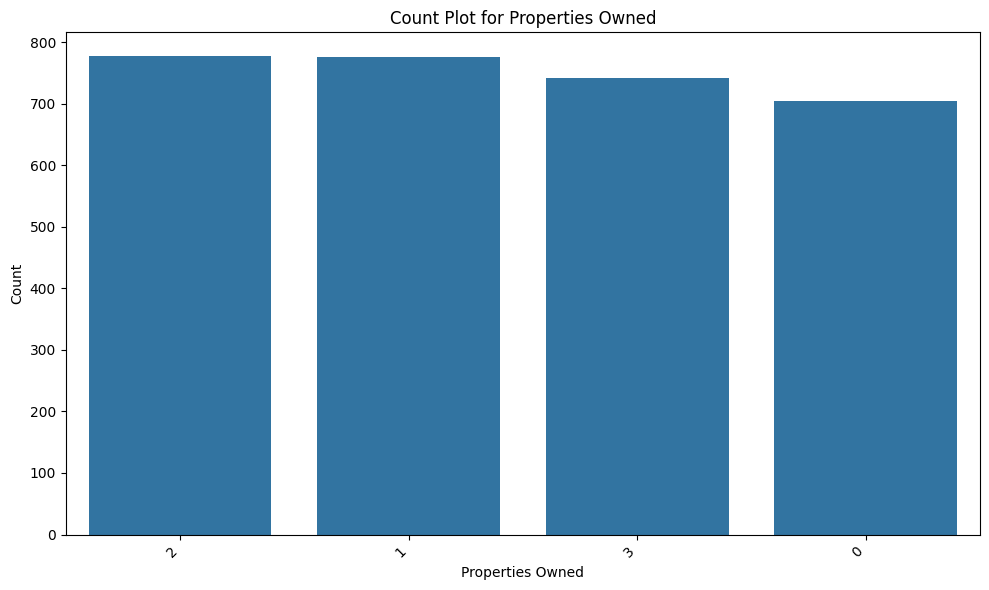

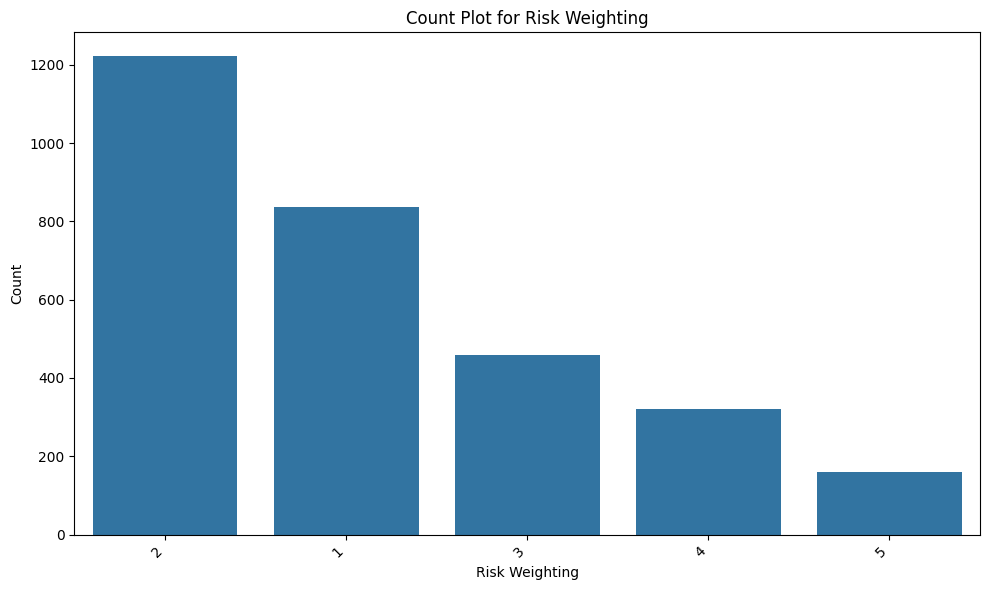

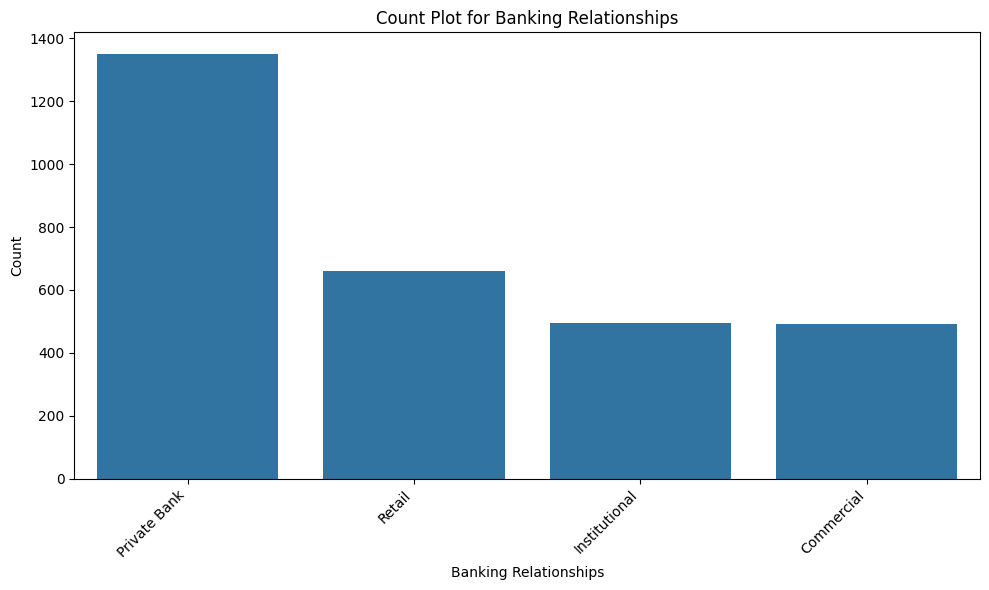

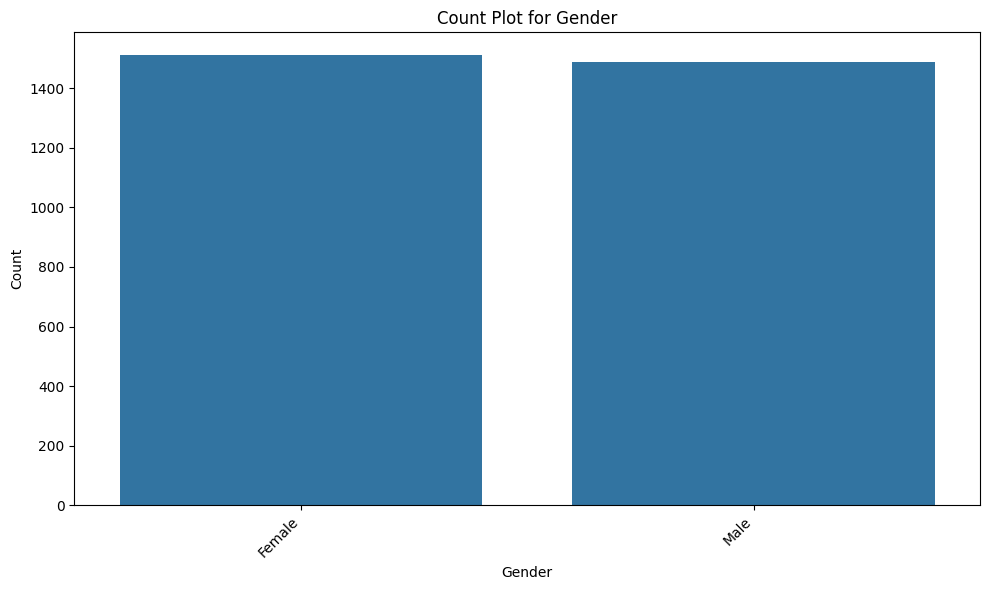

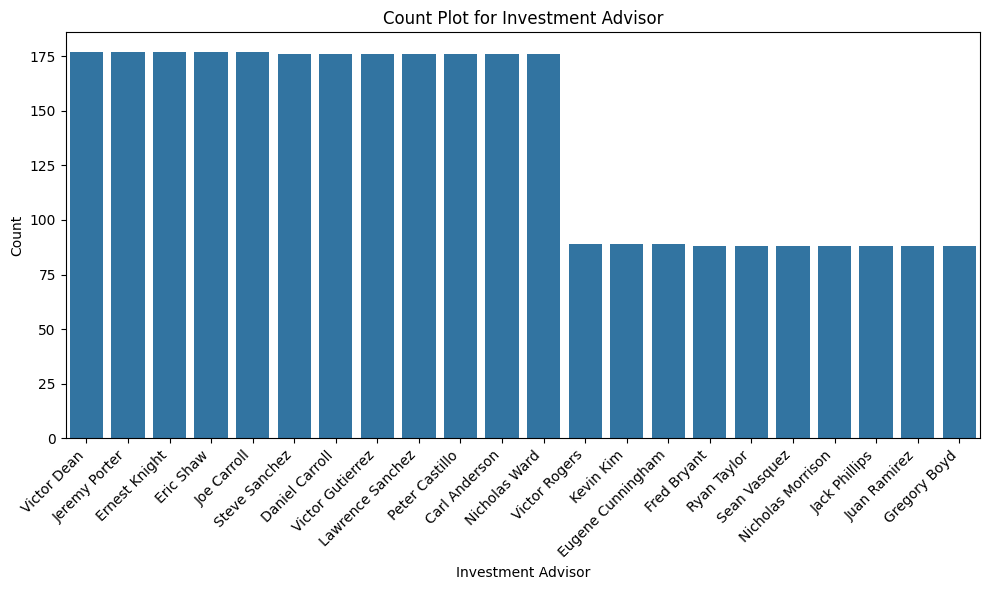

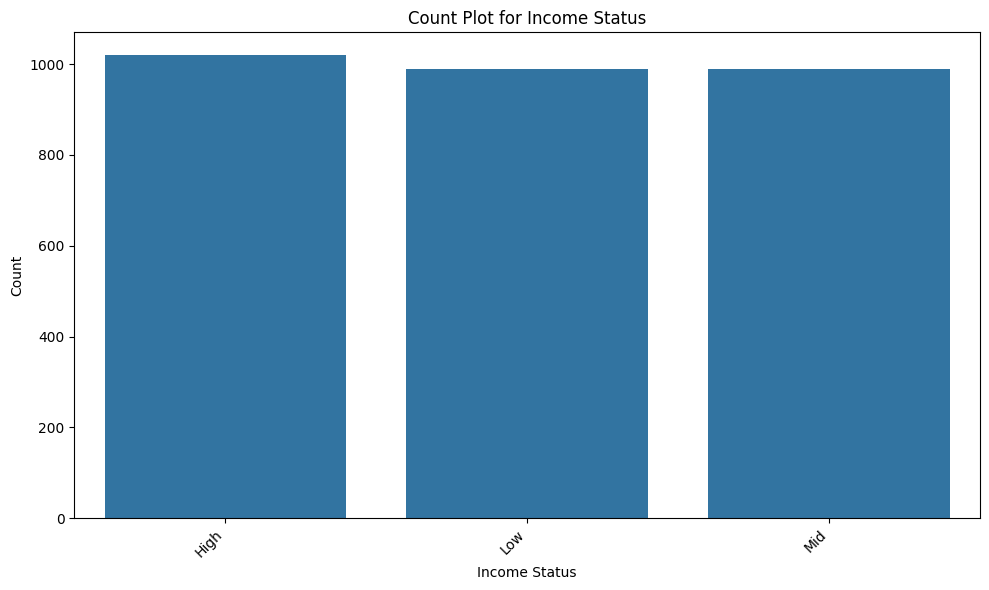

In [13]:
cat_columns2 = df[["Nationality","Fee Structure","Loyalty Classification","Amount of Credit Cards","Properties Owned",
                   "Risk Weighting","Banking Relationships","Gender","Investment Advisor","Income Status"]]
for col in cat_columns2:
    plt.figure(figsize = (10,6))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Count Plot for {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

BIVAARIATE ANALYSIS

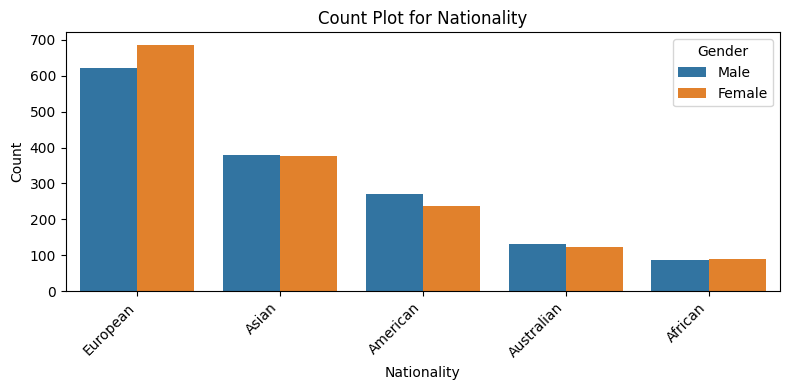

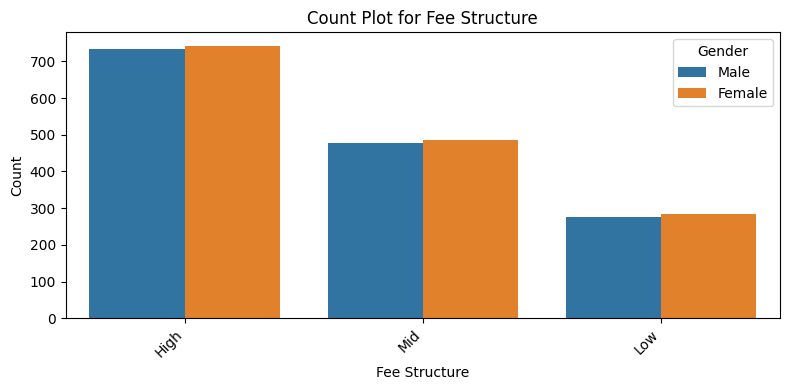

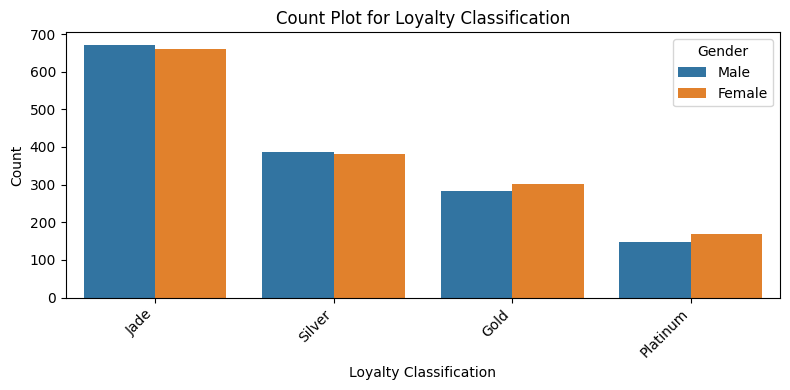

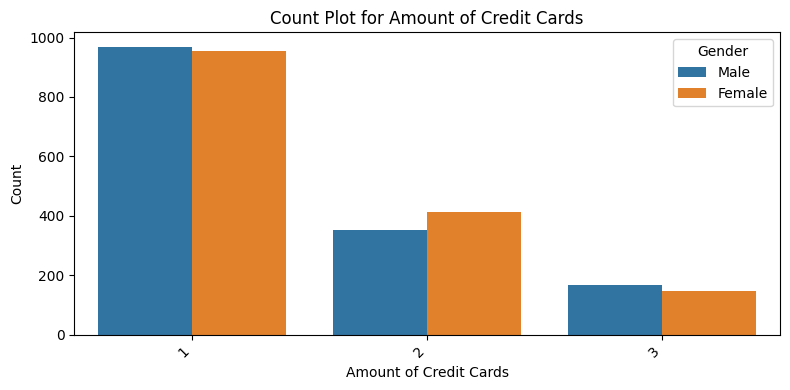

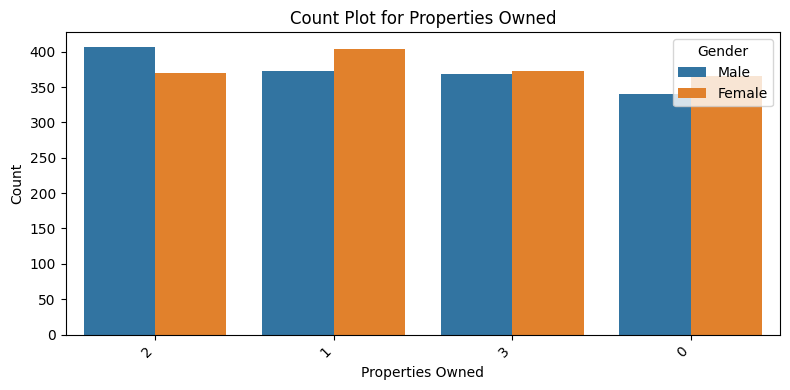

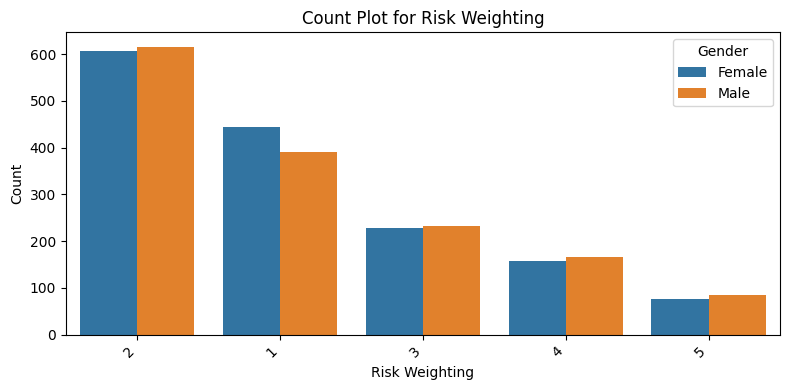

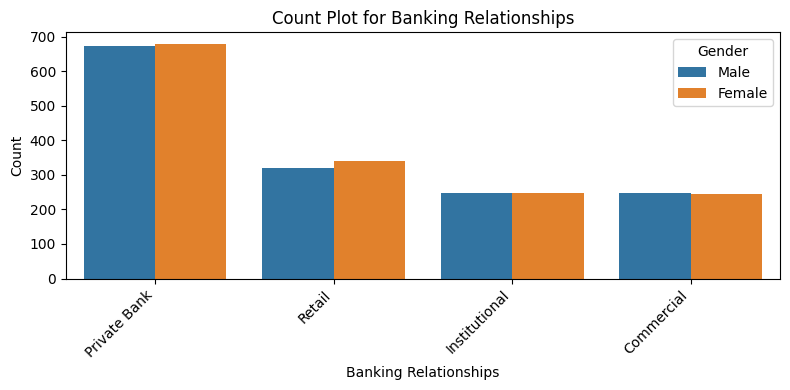

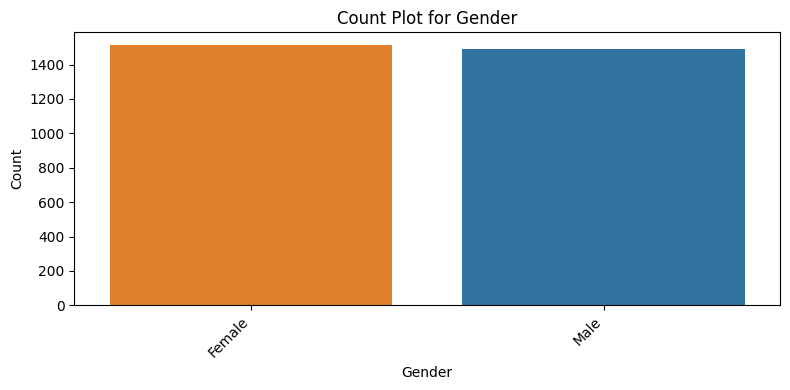

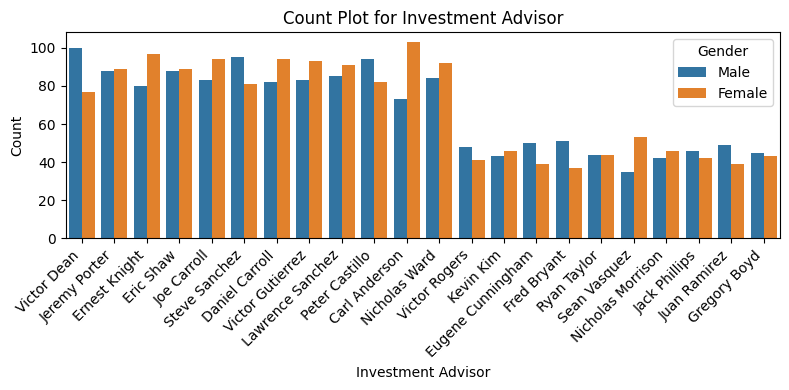

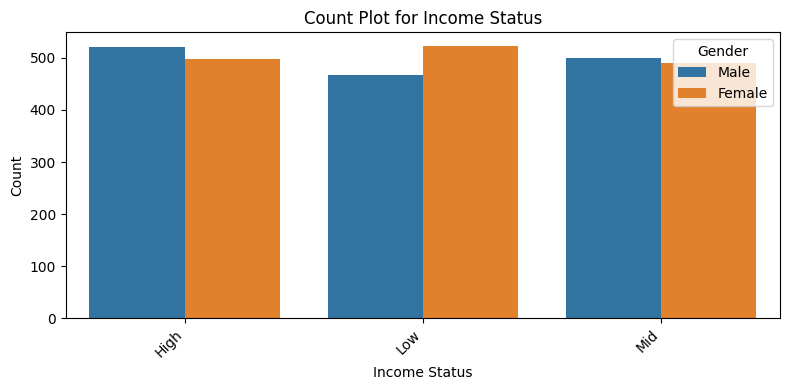

In [14]:
# Generate count plots for categorical variables in the dataset, broken down by gender

cat_columns2 = df[["Nationality","Fee Structure","Loyalty Classification","Amount of Credit Cards","Properties Owned","Risk Weighting",	"Banking Relationships","Gender","Investment Advisor","Income Status"]].columns
for col in cat_columns2:
    plt.figure(figsize = (8,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index,hue = "Gender")
    plt.title(f"Count Plot for {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

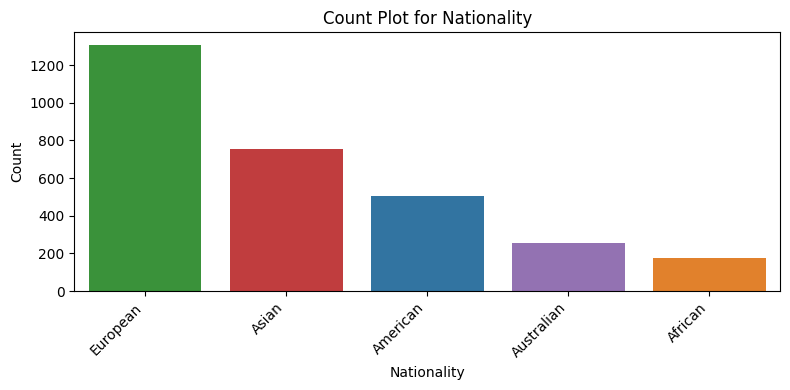

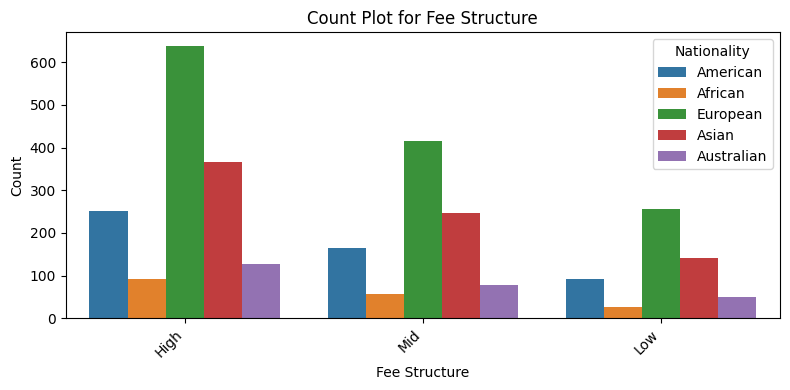

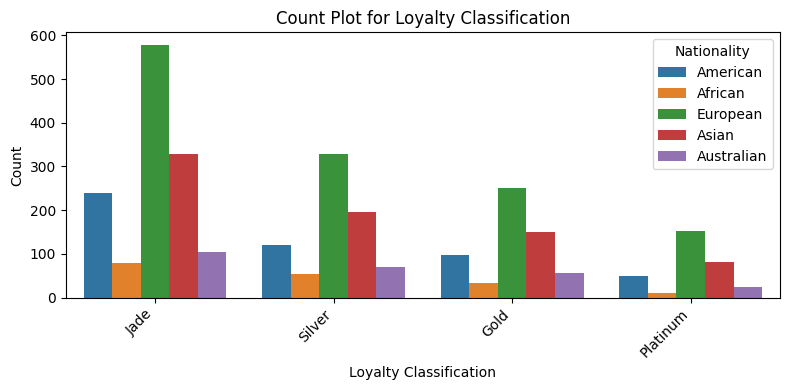

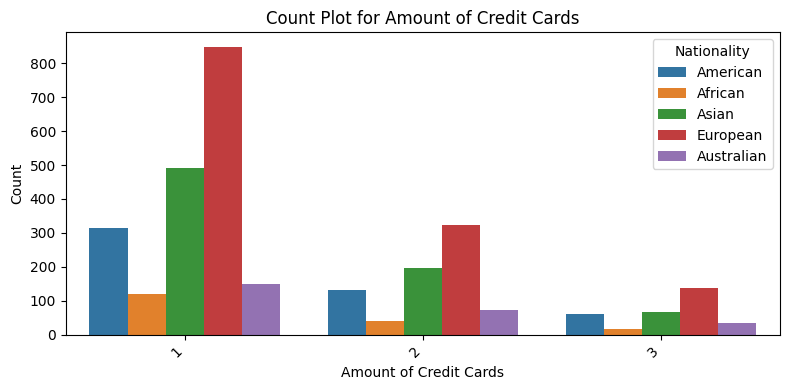

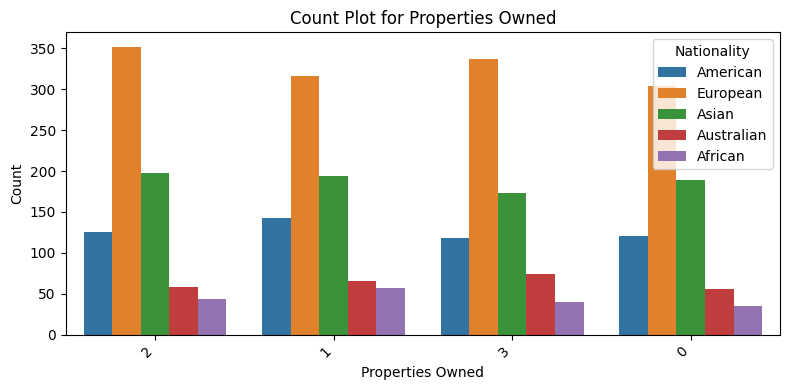

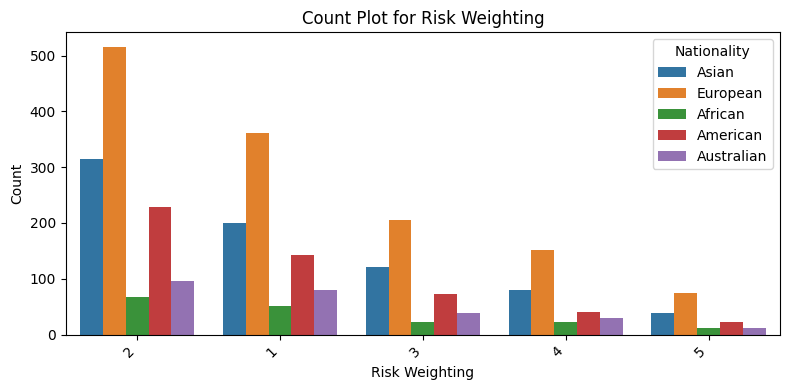

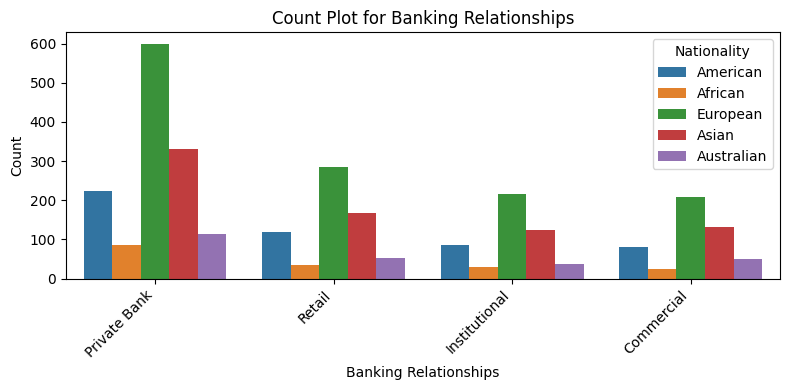

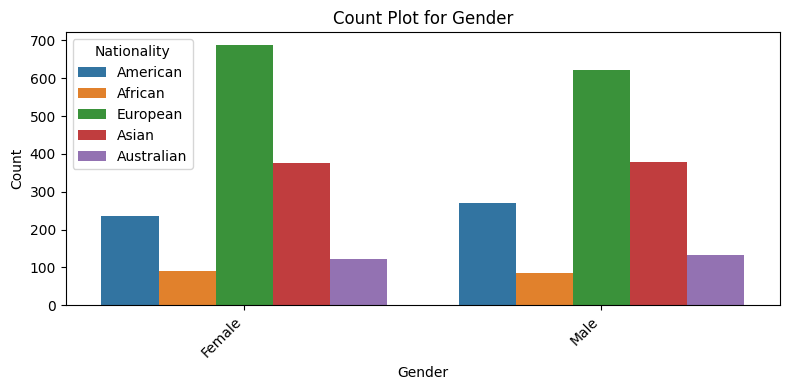

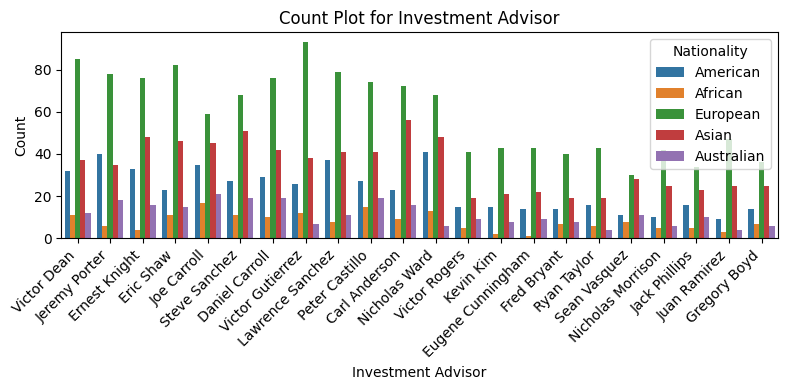

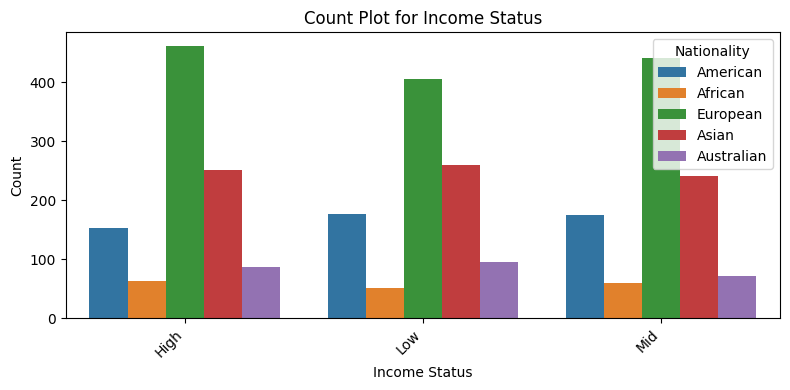

In [15]:
#Generate count plots for categorical variables in the dataset, broken down by nationality
cat_columns2 = df[["Nationality","Fee Structure","Loyalty Classification","Amount of Credit Cards","Properties Owned","Risk Weighting",
                   "Banking Relationships","Gender","Investment Advisor","Income Status"]]
for col in cat_columns2:
    plt.figure(figsize = (8,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index,hue = "Nationality")
    plt.title(f"Count Plot for {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# European nationality has the highest count across all fields.

In [16]:
df.columns

Index(['Client ID', 'Name', 'Age', 'Location ID', 'Joined Bank',
       'Banking Contact', 'Nationality', 'Occupation', 'Fee Structure',
       'Loyalty Classification', 'Estimated Income', 'Superannuation Savings',
       'Amount of Credit Cards', 'Credit Card Balance', 'Bank Loans',
       'Bank Deposits', 'Checking Accounts', 'Saving Accounts',
       'Foreign Currency Account', 'Business Lending', 'Properties Owned',
       'Risk Weighting', 'Banking Relationships', 'Gender',
       'Investment Advisor', 'Income Status'],
      dtype='object')

In [17]:
display(df["Occupation"].value_counts())

Occupation
Associate Professor             28
Structural Analysis Engineer    28
Recruiter                       25
Account Coordinator             24
Human Resources Manager         24
                                ..
Office Assistant IV              8
Automation Specialist I          7
Computer Systems Analyst I       6
Developer III                    5
Senior Sales Associate           4
Name: count, Length: 195, dtype: int64

NUMERICAL ANALYSIS

In [18]:
numerical_col = df[["Estimated Income", "Superannuation Savings","Credit Card Balance","Bank Loans","Bank Deposits",
                    "Checking Accounts","Saving Accounts","Foreign Currency Account","Business Lending","Age"]]
plt.figure(figsize = (16,12))



<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

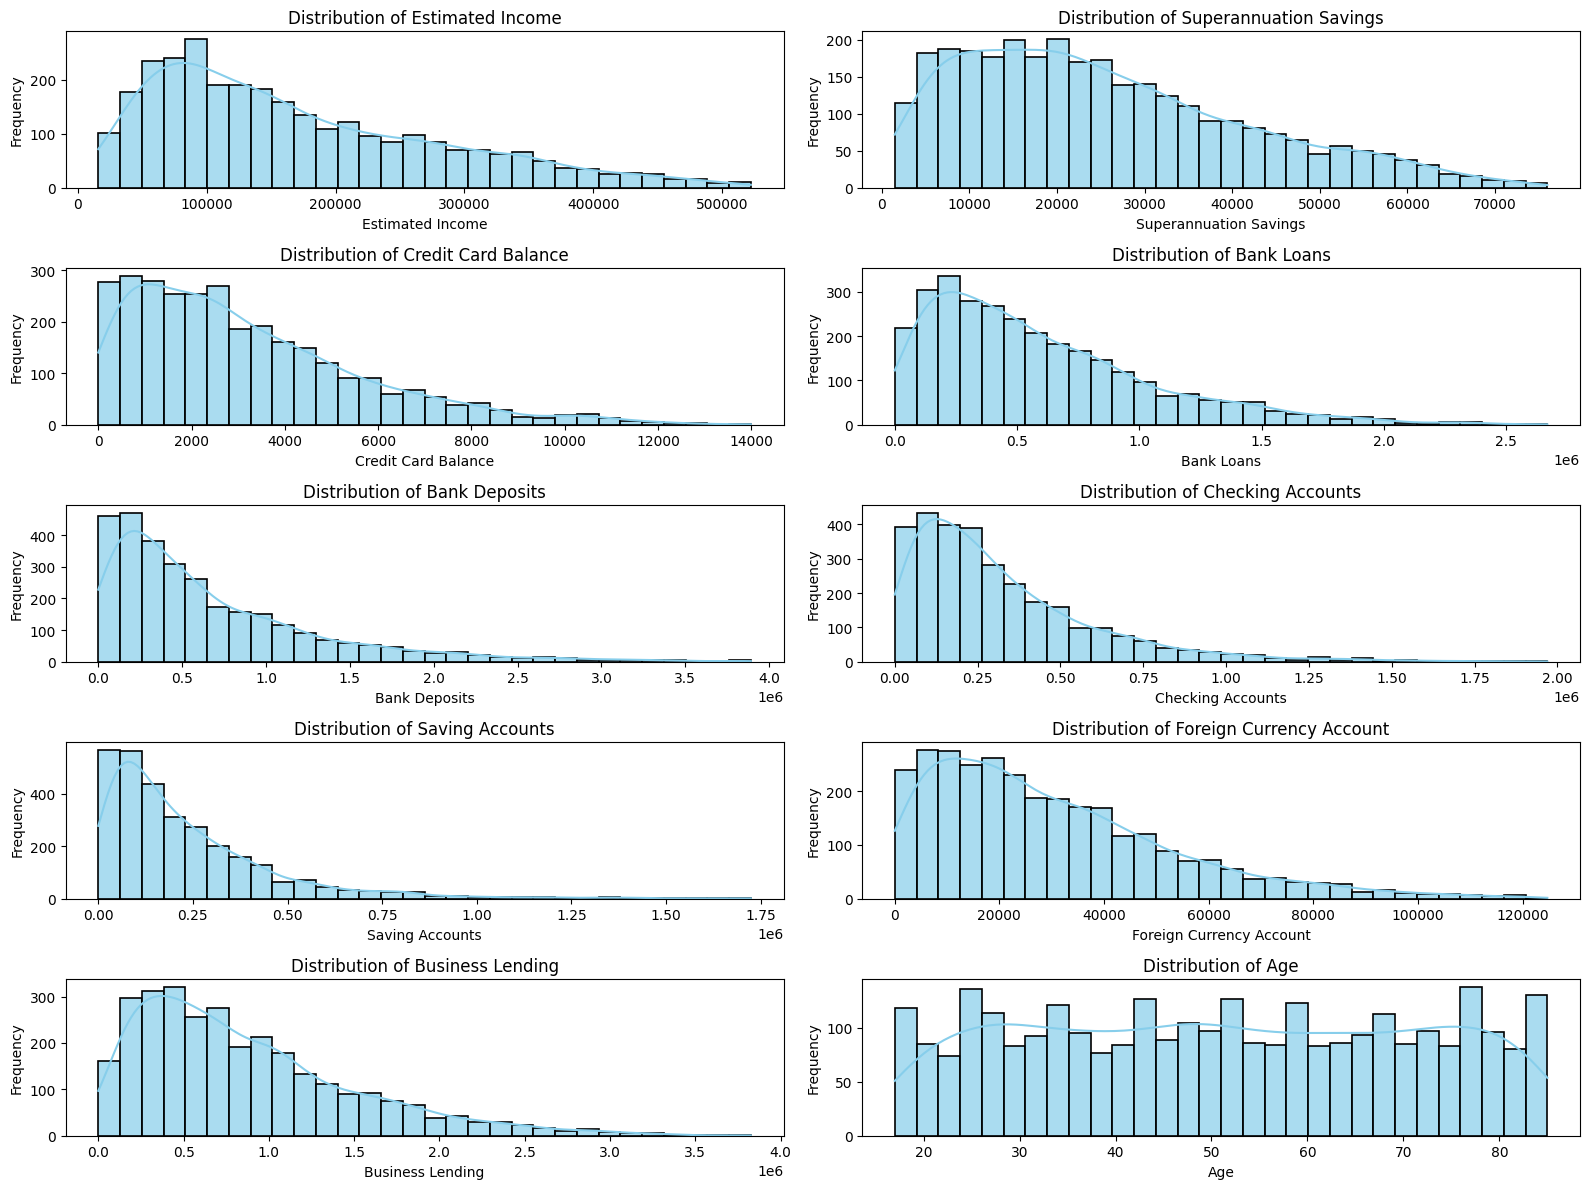

In [19]:
numerical_col = df[["Estimated Income", "Superannuation Savings","Credit Card Balance","Bank Loans","Bank Deposits",
                    "Checking Accounts","Saving Accounts","Foreign Currency Account","Business Lending","Age"]]
plt.figure(figsize=(16,12))
for i,col in enumerate(numerical_col):
    plt.subplot(5,2,i+1)
    sns.histplot(
        data=df,
        x=col,
        kde=True,
        bins=30,
        color='skyblue',
        edgecolor='black',
        alpha=0.7,
        linewidth=1.2
    )
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
plt.show()


# Creating New Profile Risk Status

In [20]:
# Since the old risk weightings contain some misleading values, we are assigning new risk weightings 
# based on factors such as Total Loan, Total Balance, Properties Owned, Income Status, Credit Card Balance, and Loan Multiple.

In [21]:
df["Total Loan"] = df["Bank Loans"] + df["Business Lending"]
df["Total balance"] = df["Bank Deposits"] + df["Checking Accounts"] + df["Saving Accounts"]

In [22]:
# Replace rows where Total balance is zero or NaN with a small value or NaN to avoid division by zero
df['Loan Multiple'] = df.apply(
    lambda row: round(row['Total Loan'] / row['Total balance'], 2) if row['Total balance'] != 0 else float('nan'),
    axis=1
)

In [23]:
df['Credit Balance Bin'] = pd.qcut(df['Credit Card Balance'], q=4, labels=["Low", "Medium", "High", "Very High"])

In [24]:
# For Loan Multiple < 1, mark as 1
df.loc[df['Loan Multiple'] < 1, 'New Risk Weighting'] = 1

# For Loan Multiple between 1 and 3, apply conditions for new risk weighting
df.loc[(df['Loan Multiple'] >= 1) & (df['Loan Multiple'] < 3), 'New Risk Weighting'] = df.apply(
    lambda row: 2 if row['Income Status'] == 'High' or row['Properties Owned'] > 1 or row['Credit Card Balance'] < 1000
    else 3, axis=1)

# For Loan Multiple between 3 and 4, apply conditions for new risk weighting
df.loc[(df['Loan Multiple'] > 3) & (df['Loan Multiple'] <= 4), 'New Risk Weighting'] = df.apply(
    lambda row: 3 if row['Income Status'] == 'High' or row['Properties Owned'] >= 1 and row['Credit Card Balance'] < 2000 or row['Properties Owned'] >= 2
    else 4, axis=1)

# For Loan Multiple > 4, apply conditions for new risk weighting
df.loc[df['Loan Multiple'] > 4, 'New Risk Weighting'] = df.apply(
    lambda row: 3 if row['Income Status'] == 'High' and row['Properties Owned'] > 2
    else 4 if row['Income Status'] == 'High'
    else 3 if row['Properties Owned'] == 3
    else 4 if row['Properties Owned'] >= 2 and row['Credit Card Balance'] < 2500
    else 5, axis=1)

In [37]:
df.drop(columns = "Risk_Level",inplace = True)

In [38]:
df.head()

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,Banking Relationships,Gender,Investment Advisor,Income Status,Total Loan,Total balance,Loan Multiple,Credit Balance Bin,New Risk Weighting
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,75384.77,17677.95,1,484.54,776242.92,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,Retail,Male,Victor Dean,Low,1910718.22,2696778.98,0.71,Low,1.0
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,289834.31,17398.92,1,2256.88,1270615.43,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,Institutional,Male,Jeremy Porter,High,3271141.53,1215639.32,2.69,Medium,2.0
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,169935.23,42825.90,2,4568.74,1052715.84,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,Private Bank,Female,Ernest Knight,Mid,1600853.42,1889130.63,0.85,Very High,1.0
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,356808.11,5473.15,2,4205.00,121195.06,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,Commercial,Male,Eric Shaw,High,1269597.35,2331000.00,0.54,High,1.0
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,130711.68,48077.60,1,3779.49,1048301.95,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,Retail,Female,Kevin Kim,Mid,2722714.07,1062778.23,2.56,High,3.0


Financial Loss Risk by New Risk Weighting:
                    Total Loan               Total balance Properties Owned  \
                        median           sum        median           median   
New Risk Weighting                                                            
1.0                 1028973.78  1.353108e+09    1640983.04              2.0   
2.0                 1434181.00  1.555893e+09     857348.39              2.0   
3.0                 1303521.82  8.757821e+08     572695.33              1.0   
4.0                 1533747.65  3.244788e+08     247950.14              1.0   
5.0                 1140453.04  2.056526e+08     158615.39              1.0   

                         Estimated Income Credit Card Balance Client ID  
                     sum           median              median     count  
New Risk Weighting                                                       
1.0                 1671        145731.96             2807.34      1114  
2.0                 1781    

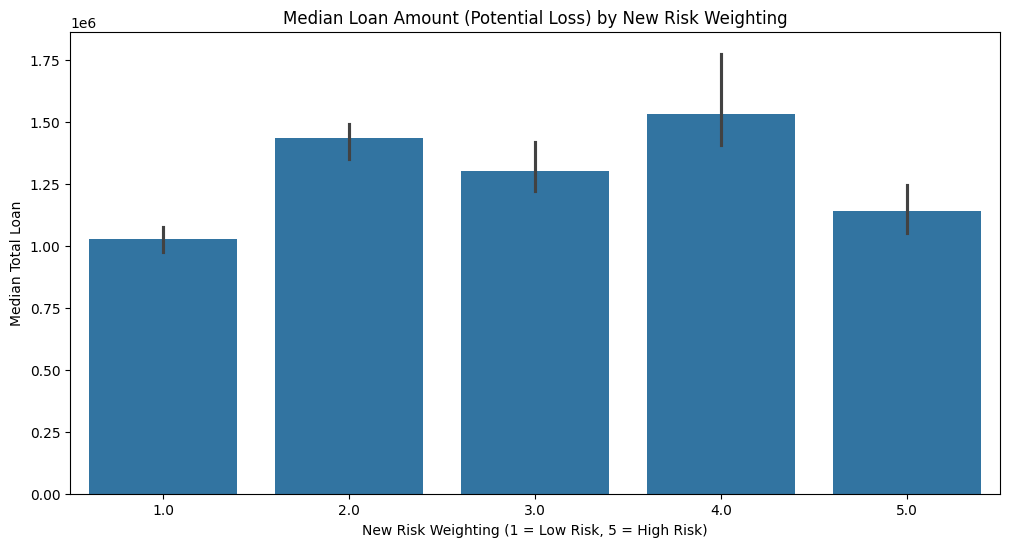

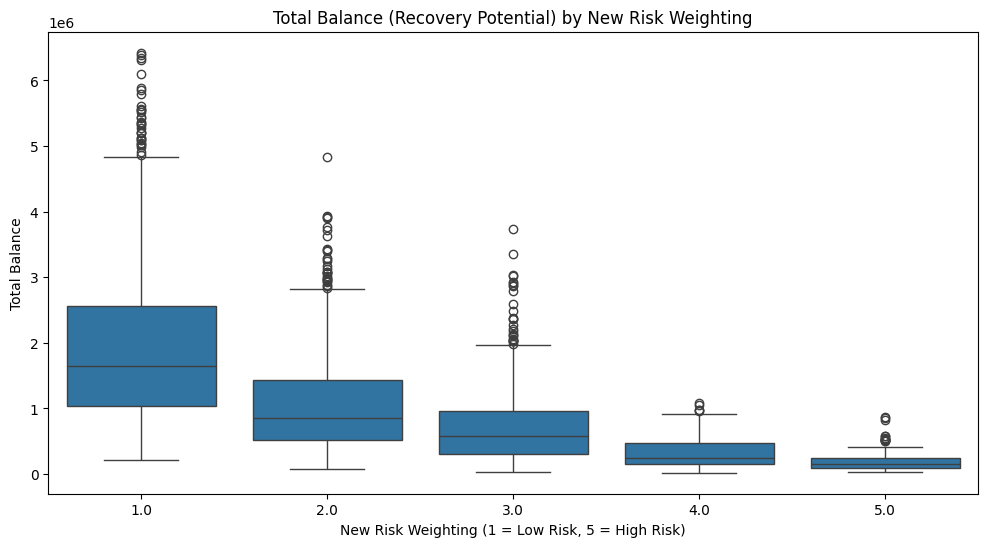


Loss Risk and Recovery Recommendations:
Risk Level 1 (1114 customers, Median Loan: 1028973.79):
  - Low loss risk: Low loans, high balance (1640983.04). Recover via account seizure if needed.
Risk Level 2 (955 customers, Median Loan: 1434181.00):
  - Low loss risk: Low loans, high balance (857348.39). Recover via account seizure if needed.
Risk Level 3 (567 customers, Median Loan: 1303521.82):
  - Moderate loss risk: Approve loans with collateral (e.g., properties) or monitor credit card debt.
Risk Level 4 (179 customers, Median Loan: 1533747.65):
  - High loss risk: High loans, low income. Recover via property seizure (1.0 properties/customer) or account seizure if balance sufficient.
Risk Level 5 (148 customers, Median Loan: 1140453.04):
  - High loss risk: High loans, low income. Recover via property seizure (1.0 properties/customer) or account seizure if balance sufficient.


In [25]:
#This analysis evaluates financial risk across customer segments based on New Risk Weighting levels.
#We summarize potential loss (via Total Loan), and possible recovery options (via Total balance and Properties Owned).
#Visualizations help compare loss and recovery across risk levels, and recommendations are provided to guide loan approval strategies.

#Step_1- Summarize loss risk and recovery potential
risk_summary = df.groupby("New Risk Weighting").agg({
    "Total Loan": ["median", "sum"],  # Potential loss
    "Total balance": ["median"],  # Recovery via account seizure
    "Properties Owned": ["median", "sum"],  # Recovery via property seizure
    "Estimated Income": ["median"],
    "Credit Card Balance": ["median"],
    "Client ID": ["count"]
}).round(2)
print("Financial Loss Risk by New Risk Weighting:")
print(risk_summary)

#Step2 - Visualize loss vs. recovery
plt.figure(figsize=(12, 6))
sns.barplot(x="New Risk Weighting", y="Total Loan", data=df, estimator=np.median)
plt.title("Median Loan Amount (Potential Loss) by New Risk Weighting")
plt.xlabel("New Risk Weighting (1 = Low Risk, 5 = High Risk)")
plt.ylabel("Median Total Loan")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x="New Risk Weighting", y="Total balance", data=df)
plt.title("Total Balance (Recovery Potential) by New Risk Weighting")
plt.xlabel("New Risk Weighting (1 = Low Risk, 5 = High Risk)")
plt.ylabel("Total Balance")
plt.show()

# Step 3: Loss-focused recommendations
print("\nLoss Risk and Recovery Recommendations:")
for risk_level in range(1, 6):
    level_data = df[df["New Risk Weighting"] == risk_level]
    count = level_data.shape[0]
    median_loan = level_data["Total Loan"].median()
    median_balance = level_data["Total balance"].median()
    median_properties = level_data["Properties Owned"].median()
    print(f"Risk Level {risk_level} ({count} customers, Median Loan: {median_loan:.2f}):")
    if risk_level >= 4:
        print(f"  - High loss risk: High loans, low income. Recover via property seizure ({median_properties} properties/customer) or account seizure if balance sufficient.")
    elif risk_level == 3:
        print(f"  - Moderate loss risk: Approve loans with collateral (e.g., properties) or monitor credit card debt.")
    else:
        print(f"  - Low loss risk: Low loans, high balance ({median_balance:.2f}). Recover via account seizure if needed.")


In [26]:
df.columns

Index(['Client ID', 'Name', 'Age', 'Location ID', 'Joined Bank',
       'Banking Contact', 'Nationality', 'Occupation', 'Fee Structure',
       'Loyalty Classification', 'Estimated Income', 'Superannuation Savings',
       'Amount of Credit Cards', 'Credit Card Balance', 'Bank Loans',
       'Bank Deposits', 'Checking Accounts', 'Saving Accounts',
       'Foreign Currency Account', 'Business Lending', 'Properties Owned',
       'Risk Weighting', 'Banking Relationships', 'Gender',
       'Investment Advisor', 'Income Status', 'Total Loan', 'Total balance',
       'Loan Multiple', 'Credit Balance Bin', 'New Risk Weighting'],
      dtype='object')

## HEATMAP

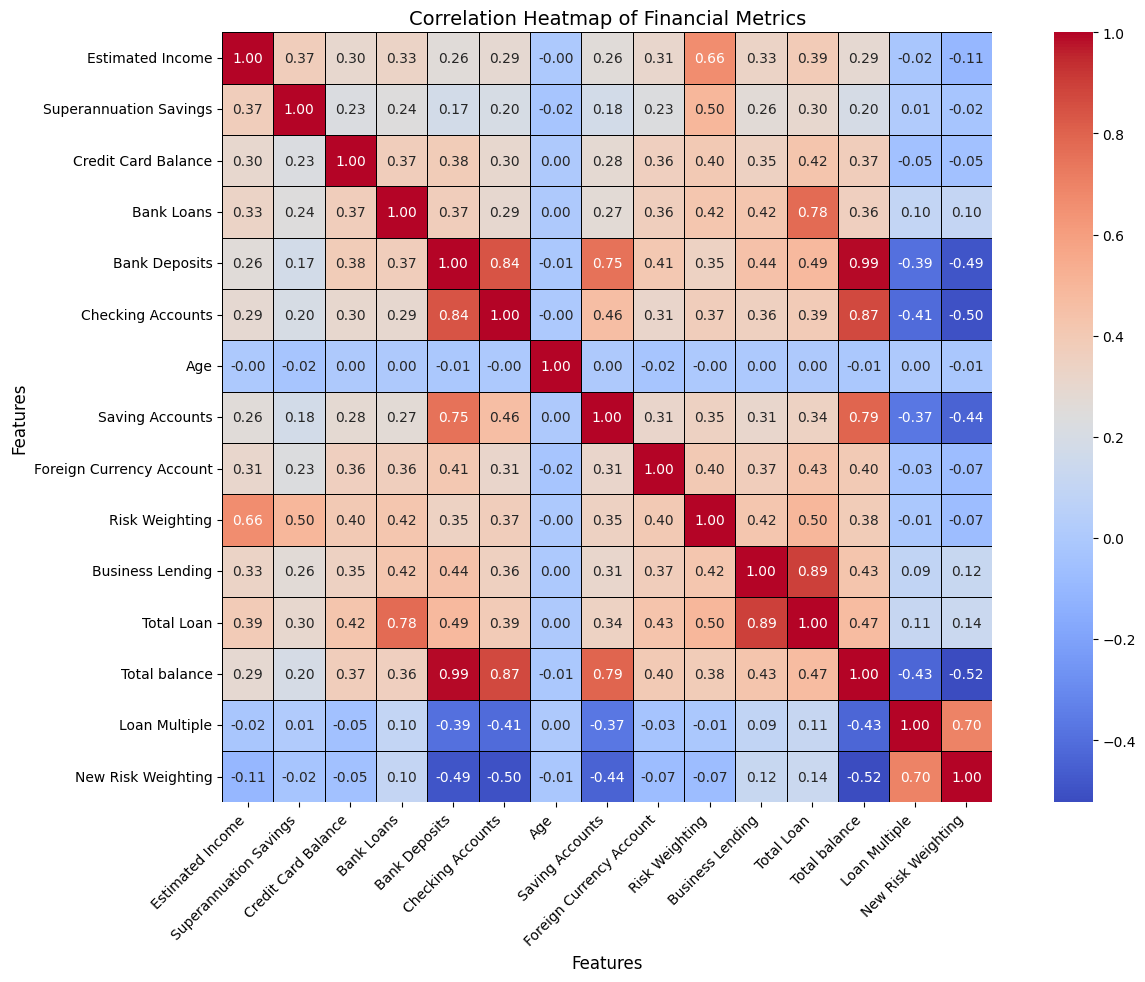

In [27]:
numerical_col = df[["Estimated Income", "Superannuation Savings", "Credit Card Balance",
                    "Bank Loans", "Bank Deposits", "Checking Accounts","Age",
                    "Saving Accounts", "Foreign Currency Account","Risk Weighting", "Business Lending","Total Loan","Total balance","Loan Multiple","New Risk Weighting"]]
correlation = numerical_col.corr()
plt.figure(figsize = (16,10))
sns.heatmap(
    correlation,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    linecolor='black',
    square=True,
)

plt.title("Correlation Heatmap of Financial Metrics", fontsize=14)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

### 🔍 Correlation Analysis: Financial Metrics vs Risk Profiles

The heatmap reveals several important relationships between financial features and customer risk levels:

#### 🧩 Key Correlations:

- **Estimated Income & Risk Weighting (0.66):**  
  Higher income is linked to higher risk — possibly due to larger borrowing behavior.

- **Total Loan & Business Lending:**  
  Strongly positively correlated with Risk Weighting — indicating higher borrowing = higher risk.

- **Superannuation Savings & Estimated Income (0.37):**  
  Clients with higher income tend to save more in retirement accounts.

- **Credit Card Balance & Risk Weighting (0.40):**  
  Moderate positive link — customers with high credit usage may pose more risk.

- **Bank Deposits & Checking Accounts (0.84):**  
  Strong correlation — higher deposit holders maintain larger checking balances too.

- **Bank Deposits & Saving Accounts (0.75):**  
  Customers with higher deposits also tend to save more.

- **Checking Accounts & Saving Accounts (0.46):**  
  Moderately correlated — clients who save more also maintain higher checking balances.

- **Business Lending & Bank Loans / Deposits:**  
  Strongly correlated — customers with business loans typically hold more deposits and bank loans.

- **Loan Multiple & New Risk Weighting (0.70):**  
  Strongest indicator — engineered feature reflects risk profile well.

- **Total Balance & New Risk Weighting (-0.52):**  
  Negative correlation — higher overall balance = lower risk.

- **Age:**  
  Almost no correlation with risk — suggesting age isn’t a deciding factor here.




In [28]:
df.to_csv("Banking_Data_Analysis")